# Exploratory Data Analysis in Python

by [DataCamp](www.datacamp.com)

link (https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python)

In [117]:
!curl -s -o nsfg.hdf5 https://assets.datacamp.com/production/repositories/4025/datasets/513eca1637050a1fa75874dc5ceabfe89e9d2668/nsfg.hdf5
!curl -s -o gss.hdf5 https://assets.datacamp.com/production/repositories/4025/datasets/01de76fde7ef43c629a7dbfb11ce91cde0210417/gss.hdf5
!curl -s -o brfss.hdf5 https://assets.datacamp.com/production/repositories/4025/datasets/0bfd1b5298cbaf58f3b4dc2c035120a8b6156d73/brfss.hdf5

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Read, Clean and Validate

In [98]:
import pandas as pd

df = pd.read_hdf("nsfg.hdf5", "nsfg")

df.head()


,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [99]:
df.shape


(9358, 10)

In [100]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [101]:
s = df["birthwgt_lb1"]
type(s)


pandas.core.series.Series

In [102]:
s.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [103]:
s.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

In [104]:
s.value_counts().sort_index()


0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [105]:
s.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [106]:
import numpy as np

pounds = df['birthwgt_lb1']
ounces = df['birthwgt_oz1']

pounds = s.replace([98,99], np.nan)

ounces.replace([98,99], np.nan, inplace=True)

weight = pounds + ounces / 16.0
weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

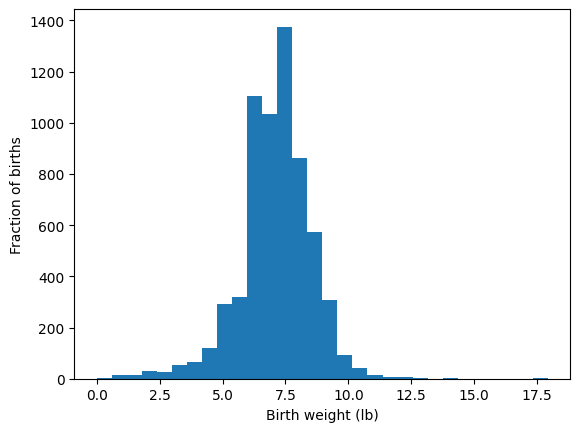

In [107]:
import matplotlib.pyplot as plt
plt.hist(weight.dropna(), bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()


In [108]:
preterm = df["prglngth"] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [109]:
preterm.sum()


3742

In [110]:
preterm.mean()

0.39987176747168196

In [111]:
preterm_weight = weight[preterm]
preterm_weight.mean()

5.577598314606742

In [112]:
preterm_weight = weight[~preterm]
preterm_weight.mean()


7.372323879231473

In [113]:
# df.filter(cond & cond2)  # AND
# df.filter(cond | cond2)  # OR

NameError: name 'cond' is not defined

## Distributions

In [ ]:
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()


,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


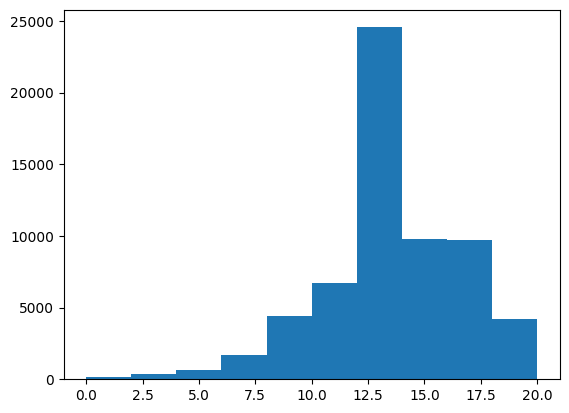

In [ ]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()


In [ ]:
pmf_educ = Pmf(educ, normalize=False)
pmf_educ.head()

NameError: name 'Pmf' is not defined

In [ ]:
pmf_educ[12]

In [ ]:
pmf_educ = Pmf(educ, normalize=True)
pmf_educ.head()

In [ ]:
pmf_educ[12]

In [ ]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

In [ ]:
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [ ]:
q = 51
p = cdf(q)
print(p)

In [ ]:
p = 0.25
q = cdf.inverse(p)
print(q) # 30


In [ ]:
p = 0.75
q = cdf.inverse(p)
print(q) # 57

In [ ]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')
plt.xlabel('Age (years)') 
plt.ylabel('Count')
plt.show()

In [ ]:
Cdf(male_age).plot(label='Male')
Cdf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


In [ ]:
income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

In [ ]:
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')


### Modelling Distributions

In [ ]:
sample = np.random.normal(size=1000)
Cdf(sample).plot()


NameError: name 'Cdf' is not defined

In [ ]:
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')
Cdf(sample).plot()

In [ ]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

<Axes: ylabel='Density'>

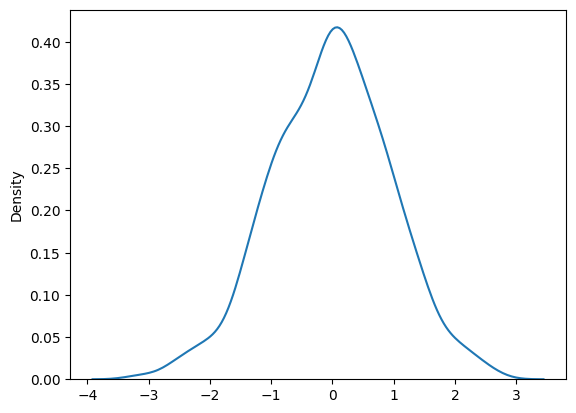

In [118]:
import seaborn as sns
sns.kdeplot(sample)


In [ ]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)


## Relationships

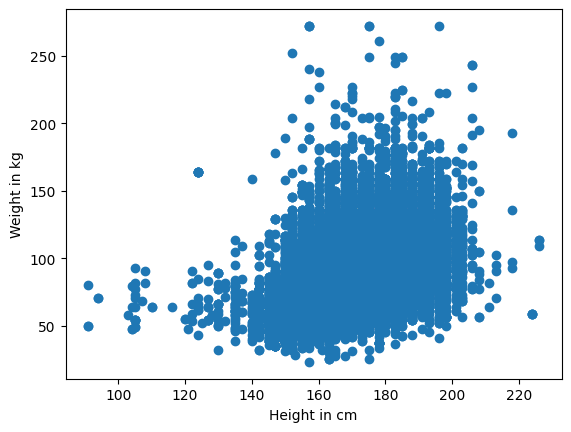

In [ ]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


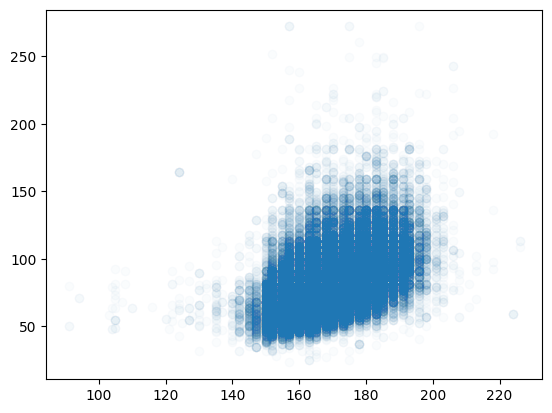

In [ ]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.show()


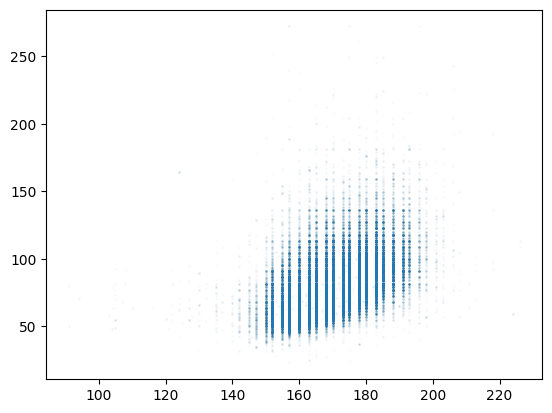

In [ ]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.show()


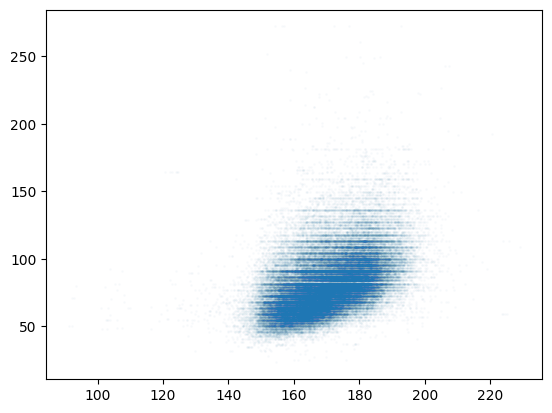

In [ ]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.show()

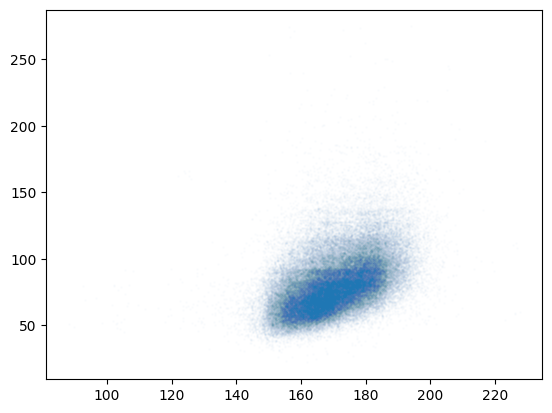

In [ ]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.show()

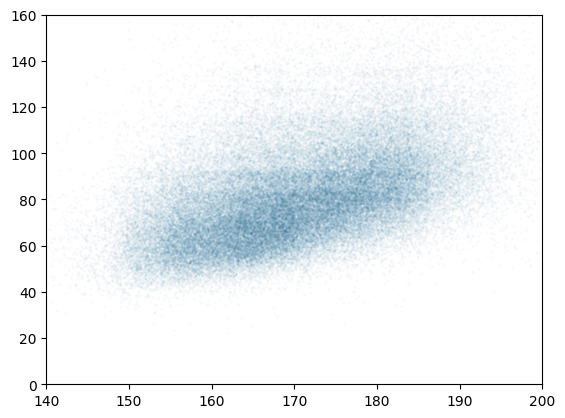

In [ ]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

### Visualizing Relationships

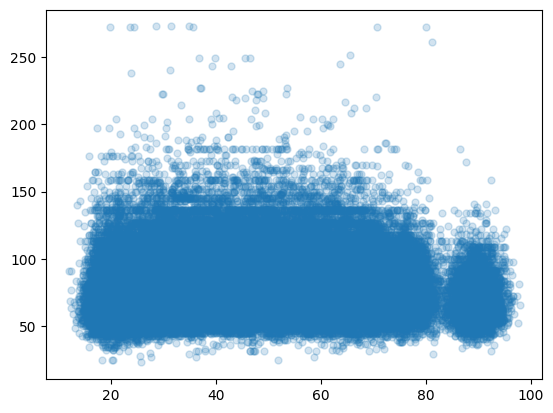

In [ ]:
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.show()

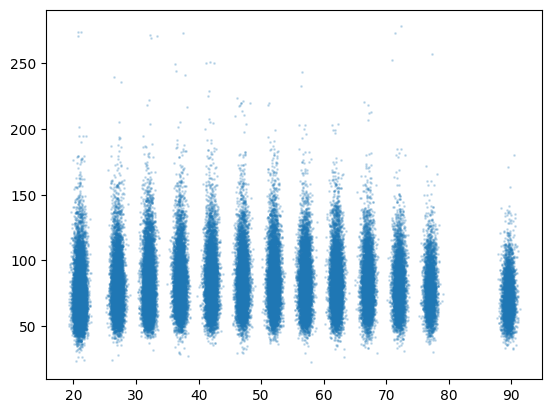

In [ ]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.show()

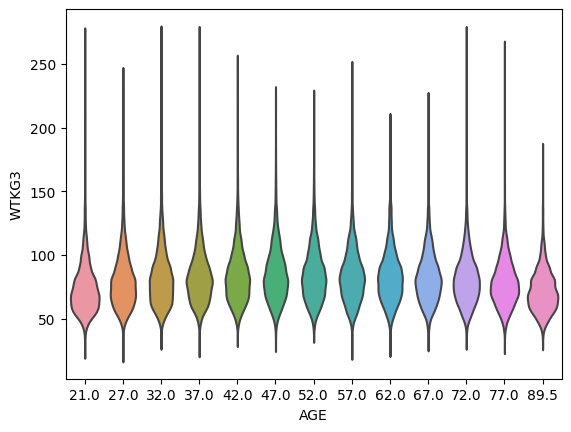

In [ ]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

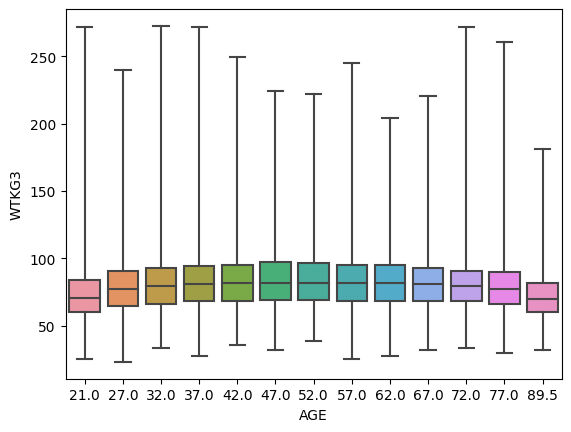

In [ ]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

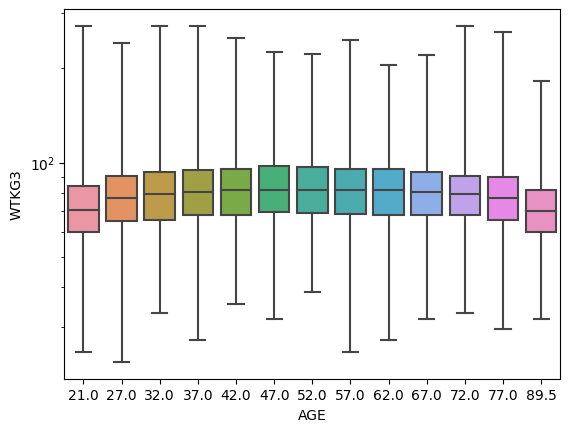

In [ ]:
#### Log Scale

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### Correlation

In [ ]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()


,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [ ]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

array([[ 1.        , -0.02386871],
       [-0.02386871,  1.        ]])

In [119]:
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9192115381848291, intercept=-75.12704250330225, rvalue=0.47420308979024595, pvalue=0.0, stderr=0.005632863769802994, intercept_stderr=0.9608860265433176)


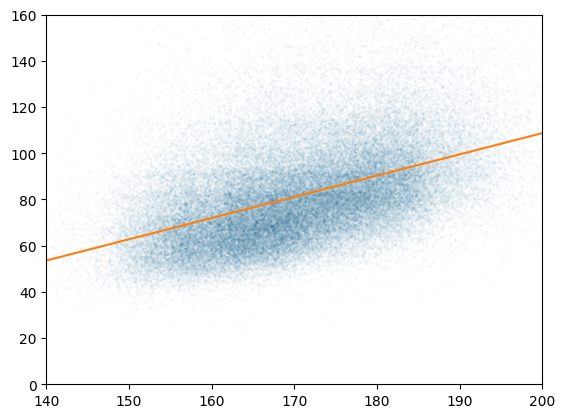

In [ ]:
xs_jitter = xs + np.random.normal(0, 2, size=len(xs))
ys_jitter = ys + np.random.normal(0, 2, size=len(ys))
plt.plot(xs_jitter, ys_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

In [ ]:
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.023981159566968703, intercept=80.07977583683224, rvalue=0.021641432889064057, pvalue=4.374327493007645e-11, stderr=0.003638139410742185, intercept_stderr=0.1868850817687016)


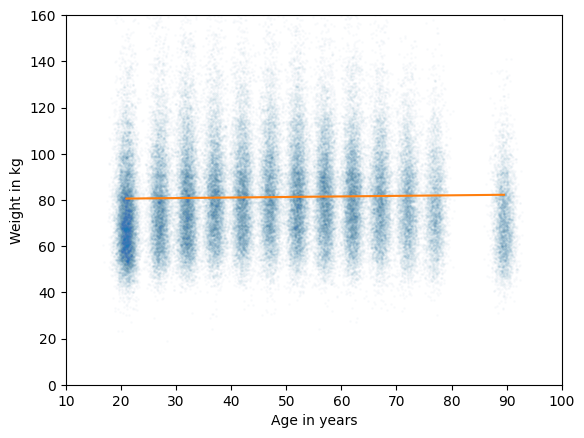

In [ ]:
plt.clf()
xs_jitter = xs + np.random.normal(0, 1, size=len(xs))
ys_jitter = ys + np.random.normal(0, 2, size=len(ys))
plt.plot(xs_jitter, ys_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([10, 100, 0, 160])
plt.xlabel("Age in years")
plt.ylabel("Weight in kg")
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

## Multivariate Thinking

### Limits of Simple Regression

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [ ]:
gss = pd.read_hdf('gss.hdf5', 'gss')
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [ ]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


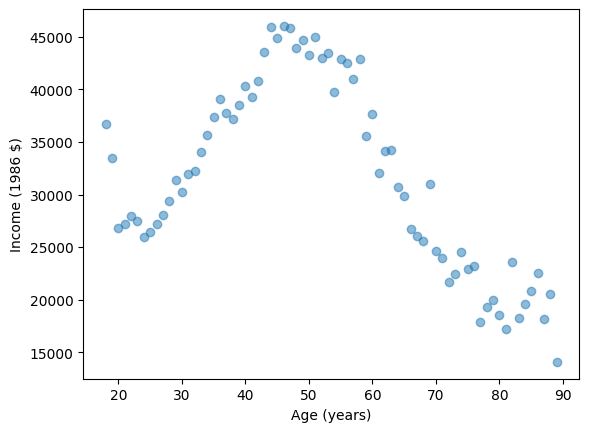

In [ ]:
grouped = gss.groupby('age')
print(type(grouped))

mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [ ]:
# Adding a quadratic term

gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

In [ ]:
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

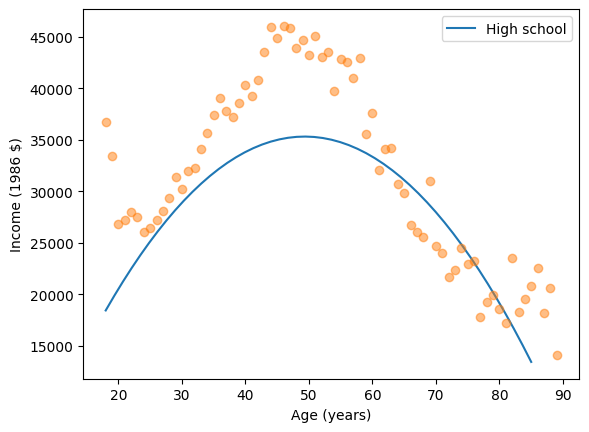

In [ ]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)

plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

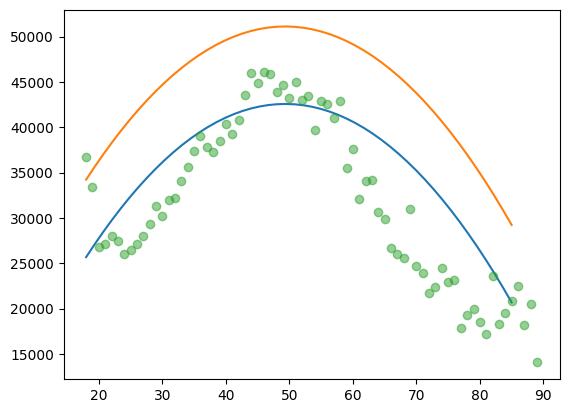

In [ ]:
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.plot(mean_income_by_age, 'o', alpha=0.5)


### Logistic Regression

In [ ]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params


Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [ ]:
gss['gunlaw'].value_counts()


1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [ ]:
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()


1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [ ]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

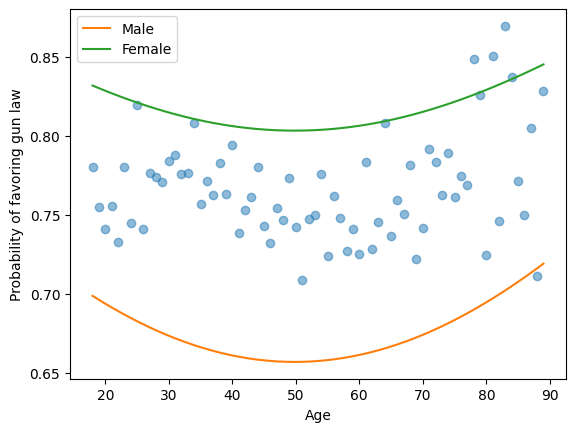

In [ ]:
# Generating Predictions

df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

# Visualizing Results
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()